# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Read the csv data into a pandas dataframe and display the first 5 samples

In [43]:
df=pd.read_csv('Real estate.csv')
df.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [45]:
shape=df.shape
shape

(414, 8)

### What are the features available in the dataset?

In [46]:
features=df.columns
features

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [47]:
missing_data=df.isnull().sum()
missing_data

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [48]:
X = df.iloc[:, :-1]
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [60]:
y = df.iloc[:, -1]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Choose the model (Linear Regression)

In [62]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [63]:
estimator = LinearRegression()

### Train the model

In [64]:
estimator.fit(X_train,y_train)

LinearRegression()

### Apply the model

In [65]:
y_pred=estimator.predict(X_test)
y_pred

array([46.59432275, 39.76270573, 39.13167556, 46.54366154, 47.54646451,
       42.83490218, 47.78473295, 46.51442861, 44.83101241, 32.68919047,
       13.63601827, 46.21962013, 48.2382138 , 41.12089742, 38.04453808,
       25.12276553, 33.91827424, 28.98009961, 35.64224026, 27.70711282,
       47.83900016, 27.77925737, 34.54402371, 46.582208  , 30.8720028 ,
       38.08824067, 38.66071971, 13.08623725, 43.16987504, 51.62486489,
       17.29913281, 44.00565248, 43.54936165, 45.98955206,  6.2841206 ,
       13.4741412 , 42.43066243, 45.60241608, 49.13848377, 54.25931303,
       37.77495788, 24.16007998, 46.48780671, 32.46858994, 32.15029   ,
       48.87704252, 35.33962276, 26.4497953 , 39.25100031, 33.39544406,
       32.77816886, 33.28438241, 47.84591638, 31.53790431, 40.82091067,
       36.74208341, 47.02145381, 44.61398008, 54.95765241, 31.43227391,
       35.91220845, 45.90687845, 40.918884  , 35.579157  ,  7.95767824,
       38.87641117, 49.34263643, 44.39505134, 54.79174808, 49.47

### Display the coefficients

In [66]:
coef=estimator.coef_
coef

array([-4.07807017e-03,  5.31467486e+00, -2.80133353e-01, -5.05771932e-03,
        1.10408522e+00,  1.97545815e+02, -3.82439155e+01])

### Find how well the trained model did with testing data

In [67]:
score = estimator.score(X_test, y_test)
r2 = 'r2 Score'
print("{} : {}".format(r2.rjust(11), score))

   r2 Score : 0.6370942611822176


### Plot House Age Vs Price
#### Hint: Use regplot in sns

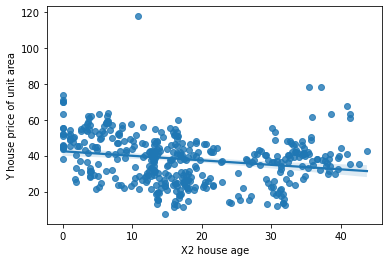

In [68]:
sns.regplot(x='X2 house age',y='Y house price of unit area',data=df)
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.show()

### Plot Distance to MRT station Vs Price

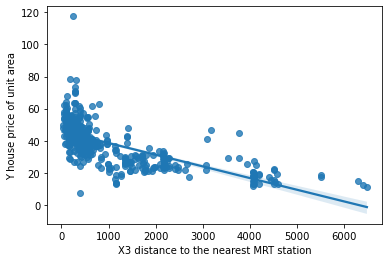

In [58]:
sns.regplot(x='X3 distance to the nearest MRT station',y='Y house price of unit area',data=df)
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.show()


### Plot Number of Convienience Stores Vs Price

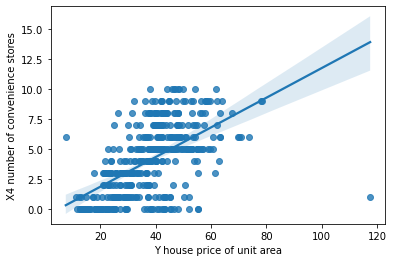

In [59]:
sns.regplot(x='Y house price of unit area',y='X4 number of convenience stores',data=df)
plt.xlabel('Y house price of unit area')
plt.ylabel('X4 number of convenience stores')
plt.show()